# Deep learning Neural Networks

Today we will use neural networks models to train and predict models that of in the MNIST dataset. This dataset will be of the handwritten digits and more information can be found [here](https://en.wikipedia.org/wiki/MNIST_database).
___

Before we get started we need a review of Neural Networks.

For a Neural network, we have the starting point for all data to be processed through. This is called a Neuron. In a network, we have hundreds of these and each do one task as to process the input data and calculate the output with the process of multiplication, usually matrix multiplication. 

For a single neuron, we have the simple formula of:

$$ \text{w} * \text{x} + \text{b} = \text{z} $$
Where:
- w: is the weights on the network. Each neuron has a random weight that is processed through with the data. 
- x: the set of input data. This will be a single or matrix value that will be processed.
- b: this value is our bias

As an output we get the term of z, which is just the overall sum or calculation of the input values. 

This single z term value is pass through an activation function. Various Activation functions are of:
<li> Percetron </li>
<li> Sigmoid </li>
<li> Tanh </li>
<li> ReLU </li>

This is the simple calculation for a singe neuron in out network. In a neural network, we have hundreds of these in many layers as presented below:

![](https://miro.medium.com/max/700/1*ZB6H4HuF58VcMOWbdpcRxQ.png)

___
The network here has three main parts to it of: 

<li> Input Layers </li>
<li> Hidden Layers</li>
<li> Output Layers </li>

These three layers are to build the network. Building a network can have many layers of the hidden layers through processing the values to get an output. From understanding the model over time, the more deep the model is or the more layers the model has, the more understanding the model gets to having higher accuracy rate.

Each layer that we add on in the model adds a component to what we are doing and the more deep that we have it the better for building a better model. 
___
In order to build a model that can predict and improve over time, we have to train it and training the model means that we must adjust the values in our model over time to correct these inaccuracies. This is where we use Cost and Lost functions are used to get the value of error that is produced. From this, we overall use gradient descent to find the correct optimal values. 

From learning the correct error and direction that our data is producing at, we can then use back-propagation to go back through our model to adjust the weights and bias values in the network to make a better model. 
___
when we approach gradient descent we must understand 3 main components to this:

<li> Learning Rate: The step size the gradient descent will take during each process </li>
<li> Batch size: Batches allow us to use stochastic gradient descent. Batch size plays an important factor in our model as how fast it can train. </li>
<li> Second order behavior: The ability to change and adjust our learning rate as we train our model. The learning rate will start to get to small sizes when we get to a point where we get to our minimum point in our gradient.  </li>

____

## MNIST Dataset

This is a popular Machine Learning dataset of a set of images that we can build models to predict an input of numbers. This contains hand written values from 0 to 9 that is represented in an array of values between 0 and 1. Each one of these values are a value of a grayscale. 

This dataset is build with 55,000 to 60,000 images of training and 10,000 more images for testing the model afterwards. 

Below, we import the MNIST dataset and we start to work and build a model to predict the values in our dataset. 

In [ ]:
#import tensflow packages 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#import and split train our data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

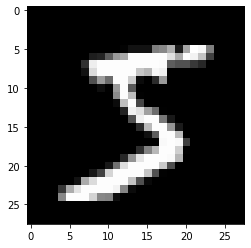

In [ ]:
#we want to show the first image of grayscale
plt.imshow(train_images[0], cmap = "gist_gray")

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

___


Above, we see the shape of the train and test datasets. See can see that overall we have 70,000 images all together which a set of arrays in the shape of 28 x 28 size. The data loaded here is color scale of 0 to 255. We will need to standardize these values to values between 0 and 1. We will divide the data in each dataset into 255 proportions of the original data. 
___

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Setting up layers 

The basics of build a model is working with layers. Below, we setup our layers that is realted to our data. For our setup we use layers.Dense to build layer neurons with the activation function of RuLU, although any activation function can work. At the end, we build the final layer that is for each output value that is possible between 0 - 9.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])

___

Below, we complie there is a few more things to setup such as the loss function and the optimizer. 

Below, we use stochastic gradient descent as our optimizer and cross entropy as our lost. 

We will also fit our model in training below, we will train the model 4 times overall to gain high accuracy but not overfit our model for images not seen in the test dataset. 

We will feed the training process with our train_images and train_labels.
___

In [ ]:
model.compile(optimizer="SGD",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7865 - accuracy: 0.7671
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9187
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2134 - accuracy: 0.9391
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1748 - accuracy: 0.9499


____
Above, we can see the product of our training. We ran our model 4 epochs times to get to a rough 95% accuracy of our training dataset. This is a good value for our training to avoid overfitting in our test dataset. 

Below, we evaluate the accuracy with the test data. As a result, we get also a 95% accuracy for our data. Rougly more than our training data result. This would mean that our model does really well with unseen data in our test dataset.
___

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1633 - accuracy: 0.9518

Test accuracy: 0.9517999887466431


___
### Predictions

Our model produces probability values what is between 0 and 1. We would like to make a prodiction of every test dataset images and produce a prediction. Below we convert all probability to a since value prediction and create a output for each image.


___

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
def predict(image_value):
  print("Predicted image value: ", np.argmax(predictions[image_value]))
  print("Image correct label: ", test_labels[image_value])
  plt.imshow(test_images[image_value], cmap = "gist_gray")
  

Predicted image value:  3
Image correct label:  3


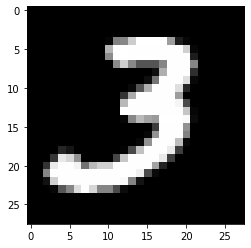

In [ ]:
predict(np.random.randint(0,10000))

Predicted image value:  2
Image correct label:  2


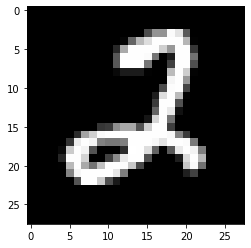

In [ ]:
predict(np.random.randint(0,10000))

Predicted image value:  8
Image correct label:  8


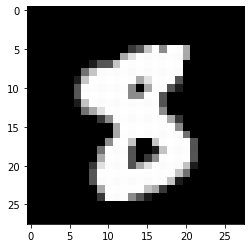

In [ ]:
predict(np.random.randint(0,10000))

## Conclusion 

Today, we worked the tensorflow packges to build a neural network. The use of this package allowed us to build a quick and fast model to train and test our data to get high accurate values as output. With the ability to build our own network with layers, optimizer, and loss it produces a really good model. 

When compared to scratch, it does the same approch and task but much faster as we have more control over our data and inputs. 

In the future, I look forward to work with convolutional neural network for this model.